# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


# A tibble: 1,000 x 2
   X                  label
   <fct>              <fct>
 1 2.45757374631015   0    
 2 1.54572671632457   0    
 3 5.51064370757444   0    
 4 0.118720644725752  0    
 5 7.5088927957137    0    
 6 0.799819440522719  0    
 7 1.91333651421514   0    
 8 1.20808393713536   0    
 9 2.85808697942625   0    
10 0.0948440795360479 0    
# ... with 990 more rows


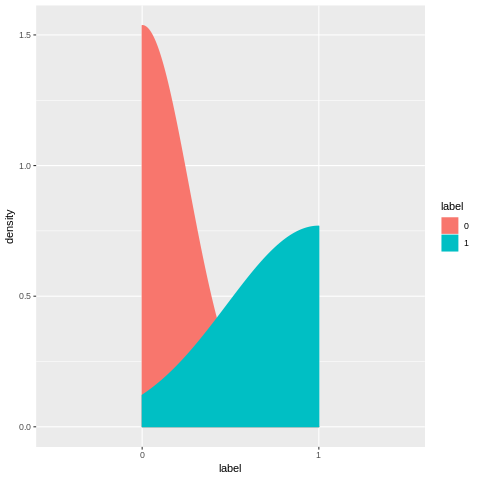

In [15]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!
dat <- dat %>% mutate(X = parse_factor(X,NULL),label = parse_factor(label,NULL))

print(dat)

dat %>% group_by(label) %>% ggplot(aes(label,colour=label,fill=label)) + geom_density()

# Problem 2: Using Classes in Python

In [123]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [18]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [23]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)

import random
random.shuffle(dat)

[[-3.6280819490620964, 1],
 [1.6938670557932882, 1],
 [3.851065673461741, 0],
 [-2.467038688219626, 0],
 [3.9723459513944133, 0],
 [-9.025686224126156, 1],
 [3.5003002586761696, 1],
 [0.9034389723246239, 1],
 [-3.3397384079492403, 0],
 [2.2408444640384557, 0],
 [-2.5833570006796567, 0],
 [-0.37814365992606236, 0],
 [-3.5002654927838464, 1],
 [6.119113855360122, 0],
 [1.9248657131609075, 0],
 [5.3817980275275605, 0],
 [0.2779794336564143, 1],
 [4.104418670642652, 0],
 [-11.310429264267142, 1],
 [1.3025652459317603, 0],
 [1.2257420306482834, 0],
 [-1.9748839339343218, 1],
 [-6.860841330887193, 1],
 [1.1552690065637954, 1],
 [1.2054125658224382, 1],
 [-0.5085992156401316, 1],
 [-8.32092678014754, 1],
 [2.4442365950466516, 0],
 [-0.07559322605651797, 0],
 [-1.0277014832433444, 0],
 [1.1906829744018306, 0],
 [1.6997774536393027, 0],
 [2.3019998463088114, 0],
 [-2.7280952060908272, 1],
 [-2.335763569062687, 1],
 [-8.544669134974075, 1],
 [0.34037659767191486, 1],
 [2.0977555011411138, 0],
 [

In [25]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [42]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

train = [dat[x:x+700] for x in range(0, len(dat), 700)]
test = [dat[x:x+300] for x in range(700, len(dat), 300)]

[[[-3.6280819490620964, 1],
  [1.6938670557932882, 1],
  [3.851065673461741, 0],
  [-2.467038688219626, 0],
  [3.9723459513944133, 0],
  [-9.025686224126156, 1],
  [3.5003002586761696, 1],
  [0.9034389723246239, 1],
  [-3.3397384079492403, 0],
  [2.2408444640384557, 0],
  [-2.5833570006796567, 0],
  [-0.37814365992606236, 0],
  [-3.5002654927838464, 1],
  [6.119113855360122, 0],
  [1.9248657131609075, 0],
  [5.3817980275275605, 0],
  [0.2779794336564143, 1],
  [4.104418670642652, 0],
  [-11.310429264267142, 1],
  [1.3025652459317603, 0],
  [1.2257420306482834, 0],
  [-1.9748839339343218, 1],
  [-6.860841330887193, 1],
  [1.1552690065637954, 1],
  [1.2054125658224382, 1],
  [-0.5085992156401316, 1],
  [-8.32092678014754, 1],
  [2.4442365950466516, 0],
  [-0.07559322605651797, 0],
  [-1.0277014832433444, 0],
  [1.1906829744018306, 0],
  [1.6997774536393027, 0],
  [2.3019998463088114, 0],
  [-2.7280952060908272, 1],
  [-2.335763569062687, 1],
  [-8.544669134974075, 1],
  [0.34037659767191

In [ ]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

## Problem 2.3: Testing models!

In [44]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label


NameError: name '_make_prediction' is not defined

In [ ]:
# Compare the two classes of models!